Se cargan las librerías:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Cuenta @FCBARCELONA

Se carga en primer lugar la base de datos de la cuenta @fcbarcelona:

In [ ]:
#df_fcbarcelona_def=pd.read_excel("df_fcbarcelona_def_sindup1_bool.xlsx")
df_fcbarcelona_def=pd.read_excel("df_fcbarcelona_def_sindup2_bool.xlsx")

#df_fcbarcelona_def=pd.read_excel("df_fcbarcelona_def_sindup3_bool.xlsx")
df_fcbarcelona_def = df_fcbarcelona_def.drop('Unnamed: 0', axis=1)
df_fcbarcelona_def

,author_followers,music_preciseDuration.preciseDuration,stats_diggCount,stats_shareCount,stats_commentCount,stats_playCount,stats_collectCount,video_duration,video_bitrate,video_volumeInfo.Loudness,video_volumeInfo.Peak,dias_fecactual_fecpublic,tasa_compromiso,hashtagh_deportesentiktok,hashtagh_football,hashtagh_tiktokfootballacademy
0,33136629,19.696314,44200,29,131,435600,1639,19,2301002,-26.2,0.46238,82,0.101837,SI,SI,NO
1,33136707,14.106063,143700,170,310,1000000,7255,12,1636718,-13.0,0.53088,83,0.144180,SI,SI,NO
2,33136972,20.924063,59200,100,201,483100,2579,20,1957611,-23.3,0.37584,83,0.123165,SI,SI,NO
3,33136721,8.803250,61300,107,209,529000,2218,8,2534813,-25.2,0.33113,83,0.116476,SI,SI,NO
4,33136094,8.385250,49600,103,131,510200,2112,8,2342641,-20.9,0.41687,83,0.097675,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,33137051,7.732188,189100,773,677,1600000,7194,7,2929667,-14.8,0.91201,233,0.081281,SI,SI,NO
293,33136019,10.161625,175700,876,495,1200000,7676,10,2424470,-19.6,0.55590,234,0.147559,SI,SI,SI
294,33136489,14.106063,158800,773,532,1300000,6445,22,733253,-9.2,1.00000,234,0.123667,SI,SI,SI
295,33136120,7.862813,250100,894,398,1600000,6556,7,2785052,-15.2,0.93325,235,0.073939,SI,SI,SI


In [ ]:
cols_categoricas = ['hashtagh_deportesentiktok','hashtagh_football', 'hashtagh_tiktokfootballacademy']
df_fcbarcelona_def[cols_categoricas] = df_fcbarcelona_def[cols_categoricas].astype("category")

Se visualiza el comportamiento de las visualizaciones respecto a las variables numéricas:

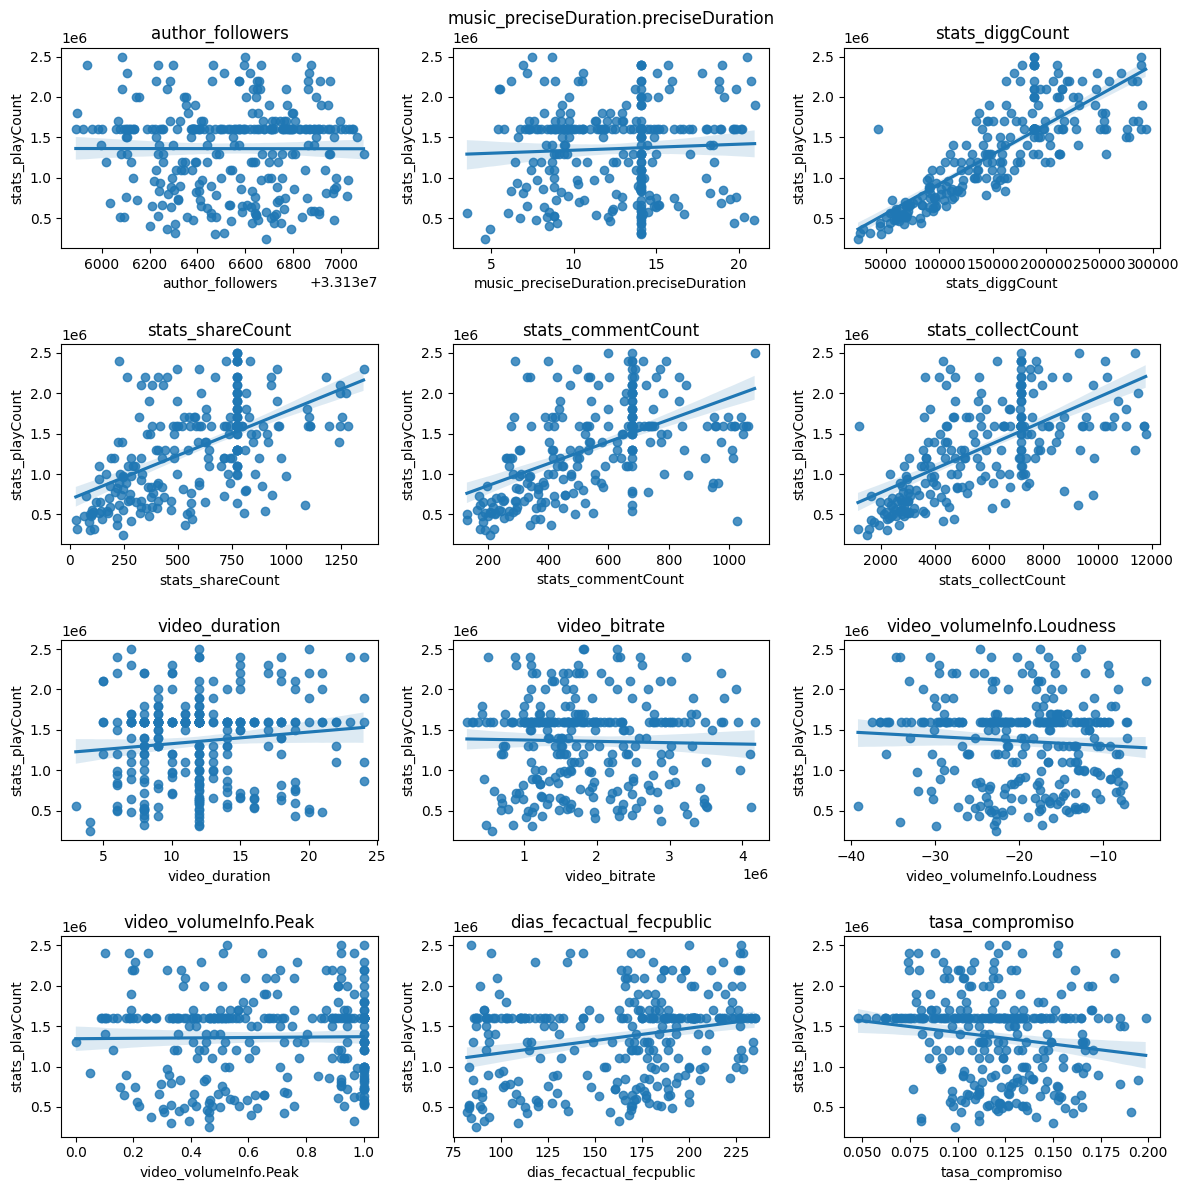

In [ ]:
#listado de variables numericas excepto stats_playCount
cols_numericas = (df_fcbarcelona_def
                  .drop(columns=["stats_playCount"])
                  .select_dtypes(include=np.number)
                  .columns.tolist())
cols_numericas

# son 15 variables numericas
# el plot seran 5 filas y 3 columnas

fig, axes = plt.subplots(4, 3, figsize=(12, 12))
axes = axes.flatten()
for i, col in enumerate(cols_numericas):
    sns.regplot(data=df_fcbarcelona_def,
                x=col, y="stats_playCount",
                ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


Correlación:

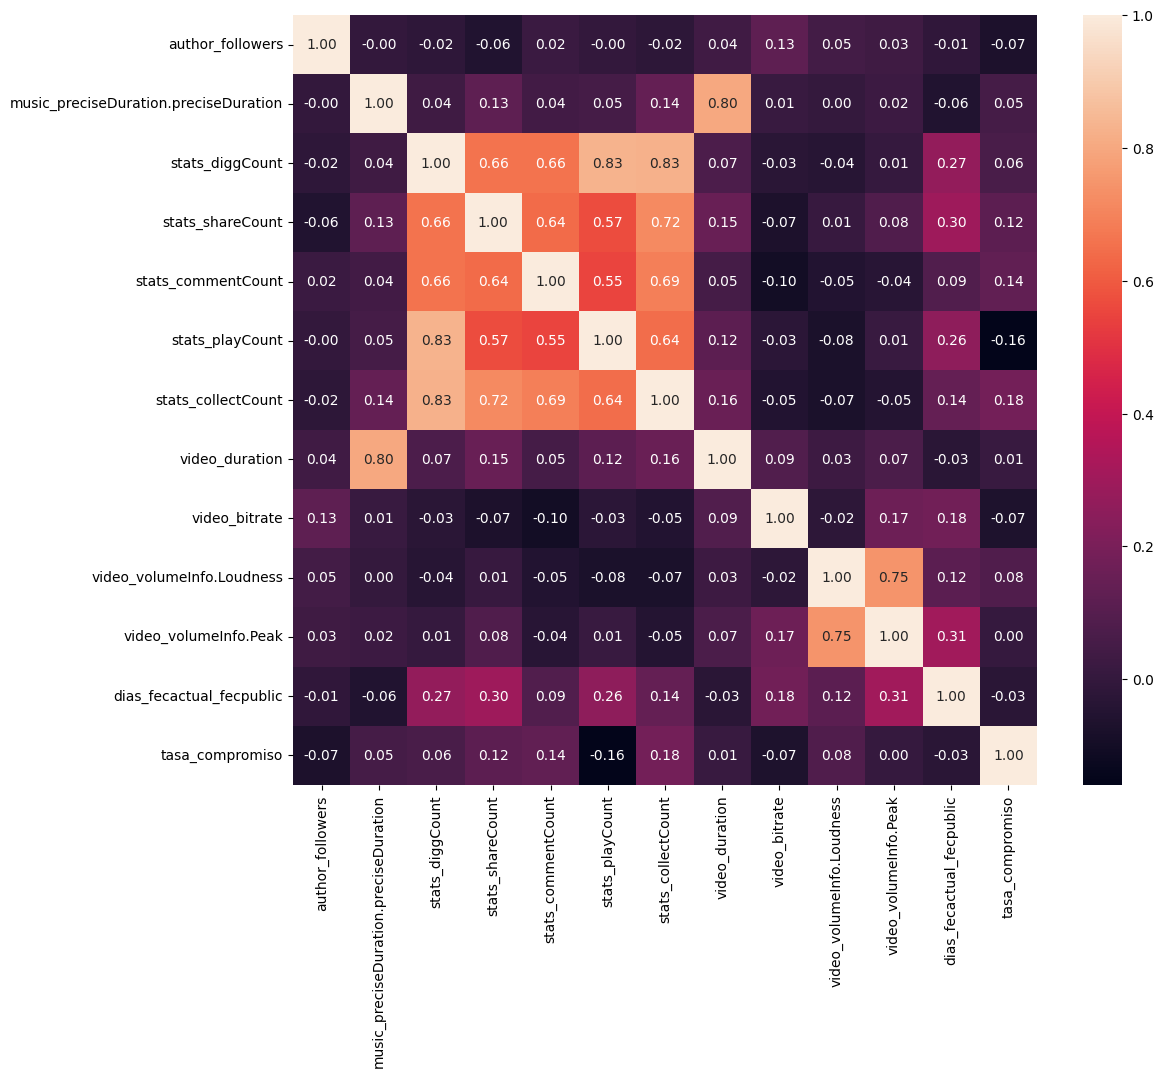

In [ ]:
# mover la columna price al inicio en el dataframe auto_df
# para que los valores de correlacion se vean al inicio

cols = df_fcbarcelona_def.columns.tolist()
cols.insert(0, cols.pop(cols.index("stats_playCount")))
auto_df = df_fcbarcelona_def.reindex(columns= cols)

automobile_corr = df_fcbarcelona_def.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(automobile_corr, annot=True, fmt=".2f");


Visualización variables categóricas:

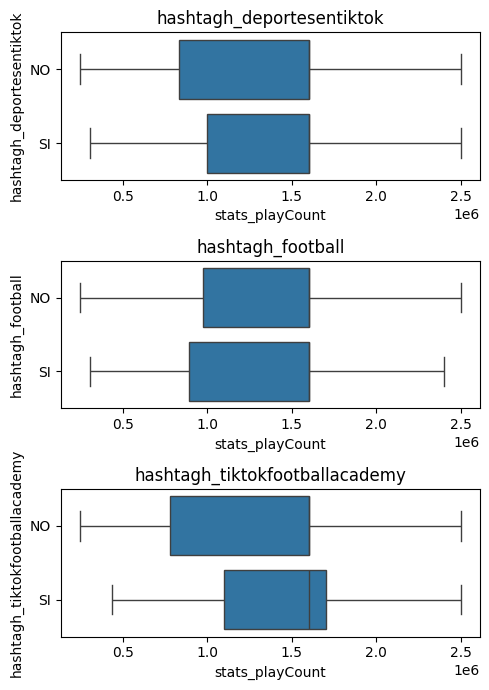

In [ ]:
# el plot seran 5 filas y 3 columnas

fig, axes = plt.subplots(3, 1, figsize=(5, 7))
axes = axes.flatten()
for i, col in enumerate(cols_categoricas):
    sns.boxplot(data=auto_df,
                x="stats_playCount", y=col,
                ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


Creacion de pipelines de transformacion, la codificacion es:

In [ ]:
cols_numericas = ['author_followers', 'music_preciseDuration.preciseDuration',
                  'stats_diggCount', 'stats_shareCount', 'stats_commentCount', 'stats_collectCount', 'video_duration',
                  'video_bitrate', 'video_volumeInfo.Loudness', 'video_volumeInfo.Peak',
                  'dias_fecactual_fecpublic', 'tasa_compromiso']

cols_categoricas = ['hashtagh_deportesentiktok', 'hashtagh_football', 'hashtagh_tiktokfootballacademy']

In [ ]:
numeric_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

categorical_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numericas', numeric_pipe, cols_numericas),
        ('categoricas', categorical_pipe, cols_categoricas)
        ])
preprocessor

ColumnTransformer(transformers=[('numericas',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['author_followers',
                                  'music_preciseDuration.preciseDuration',
                                  'stats_diggCount', 'stats_shareCount',
                                  'stats_commentCount', 'stats_collectCount',
                                  'video_duration', 'video_bitrate',
                                  'video_volumeInfo.Loudness',
                                  'video_volumeInfo.Peak',
                                  'dias_fecactual_fecpublic',
                                  'tasa_compromiso']),
                                ('categoricas',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['hashtagh_deportesentiktok',
                                  'hashtagh_football',
                                  'hashtagh_tiktokfootballacademy'])])

### Modelo de regresión

Dividir el dataset en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_features = auto_df.drop('stats_playCount', axis='columns')
Y_target = auto_df['stats_playCount']

x_train, x_test, y_train, y_test = train_test_split(X_features,
                                                    Y_target,
                                                    test_size=0.3,
                                                    random_state=42)


#### Regresión modelo simple

Cross Validation modelo simple

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

result_dict = {}

FEATURES = list(x_train.columns)
FEATURES

['author_followers',
 'music_preciseDuration.preciseDuration',
 'stats_diggCount',
 'stats_shareCount',
 'stats_commentCount',
 'stats_collectCount',
 'video_duration',
 'video_bitrate',
 'video_volumeInfo.Loudness',
 'video_volumeInfo.Peak',
 'dias_fecactual_fecpublic',
 'tasa_compromiso',
 'hashtagh_deportesentiktok',
 'hashtagh_football',
 'hashtagh_tiktokfootballacademy']

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def entrenar_modelo(modelo,
                    preprocessor: ColumnTransformer,
                    x_data: pd.DataFrame,
                    y_data: pd.Series,
                    test_frac:float=0.3,
                  ):

    # dividir el dataset en entrenamiento y prueba
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                        random_state=42,
                                                        test_size=test_frac)
    # crear el pipeline con el preprocesador y el modelo
    regressor_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                                     ("model", modelo)])

    # entrenar el pipeline de regresion
    model = regressor_pipe.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)

    # predecir con el pipeline de regresion
    y_pred = model.predict(x_test)

    rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False)

    train_score = mean_absolute_error(y_train, y_pred_train)
    test_score = mean_absolute_error(y_test, y_pred)
    R1=r2_score(y_train, y_pred_train)
    R=r2_score(y_test, y_pred)
    #R1=r2_score(y_train, y_pred_train)
    print("Entrenamiento_score (MSE) : " , train_score)
    print("Prueba_score (MSE) : ", test_score)
    print("RMSE : ", rmse)
    print("R2 entrenamiento: ", R1)
    print("R2 test: ", R)


    return {
            'Entrenamiento_score': train_score,
            'Prueba_score': test_score,
            'RMSE': rmse,
            'R2_t':R1,
            'R2':R
           }

Función para comparar resultados:

In [ ]:
# Funcion para comparar los resultados de los modelos
#se van a almacenar en un diccionario
def compare_results():
    for key in result_dict:
        print('Regresion: ', key)
        print('Entrenamiento score: ', result_dict[key]['Entrenamiento_score'])
        print('Prueba score: ', result_dict[key]['Prueba_score'])
        print('RMSE: ', result_dict[key]['RMSE'])
        print('R2 entrenamiento: ', result_dict[key]['R2_t'])
        print('R2 test: ', result_dict[key]['R2'])
        print()



Se crea un modelo simple:

In [ ]:
result_dict['Dummy Regressor'] = entrenar_modelo(DummyRegressor(strategy='median'),
                                                 preprocessor,
                                                 x_train,
                                                 y_train)


Entrenamiento_score (MSE) :  404861.80555555556
Prueba_score (MSE) :  443655.55555555556
RMSE :  607882.706548422
R2 entrenamiento:  -0.18323945003069242
R2 test:  -0.22965398555211203


Regresión lineal:

In [ ]:
result_dict['Linear Regressor'] = entrenar_modelo(LinearRegression(),
                                                 preprocessor,
                                                 x_train,
                                                 y_train)


Entrenamiento_score (MSE) :  180440.78835786547
Prueba_score (MSE) :  218920.54224321956
RMSE :  311282.4703036166
R2 entrenamiento:  0.737552393987934
R2 test:  0.6775572076496553


Lasso:

In [ ]:
result_dict['Lasso'] = entrenar_modelo(Lasso(alpha=0.5),
                                       preprocessor,
                                       x_train,
                                       y_train)

Entrenamiento_score (MSE) :  180441.3000952535
Prueba_score (MSE) :  218922.92067732508
RMSE :  311281.0703259452
R2 entrenamiento:  0.7375523925405316
R2 test:  0.6775601079844801


Ridge:

In [ ]:
result_dict['Ridge'] = entrenar_modelo(Ridge(alpha=0.5),
                                       preprocessor,
                                       x_train,
                                       y_train)


Entrenamiento_score (MSE) :  191062.92701429955
Prueba_score (MSE) :  228627.65394555955
RMSE :  314321.83876078815
R2 entrenamiento:  0.7151691860853386
R2 test:  0.6712297910684053


Elasticnet:

In [ ]:
result_dict['Elasticnet'] = entrenar_modelo(ElasticNet(alpha=1, l1_ratio=0.5,
                                                       max_iter= 100000,
                                                       warm_start= True),
                                            preprocessor,
                                            x_train,
                                            y_train)


Entrenamiento_score (MSE) :  194289.66629809473
Prueba_score (MSE) :  232253.77448452087
RMSE :  316675.5063311352
R2 entrenamiento:  0.7034685871944102
R2 test:  0.6662876401840767


KNR:

In [ ]:
result_dict['KNR'] = entrenar_modelo(KNeighborsRegressor(n_neighbors=10),
                                     preprocessor,
                                     x_train,
                                     y_train)


Entrenamiento_score (MSE) :  336129.02777777775
Prueba_score (MSE) :  409181.2698412698
RMSE :  505991.55375346064
R2 entrenamiento:  0.3613622349787655
R2 test:  0.14801905874023558


Decision Tree:

In [ ]:
result_dict['Decision Tree'] = entrenar_modelo(DecisionTreeRegressor(max_depth=2),
                                               preprocessor,
                                               x_train,
                                               y_train)


Entrenamiento_score (MSE) :  227031.98488614077
Prueba_score (MSE) :  226891.86383880544
RMSE :  303742.61346181337
R2 entrenamiento:  0.6922847057630737
R2 test:  0.6929883924999551


In [ ]:
compare_results()

Regresion:  Dummy Regressor
Entrenamiento score:  404861.80555555556
Prueba score:  443655.55555555556
RMSE:  607882.706548422
R2 entrenamiento:  -0.18323945003069242
R2 test:  -0.22965398555211203

Regresion:  Linear Regressor
Entrenamiento score:  180440.78835786547
Prueba score:  218920.54224321956
RMSE:  311282.4703036166
R2 entrenamiento:  0.737552393987934
R2 test:  0.6775572076496553

Regresion:  Lasso
Entrenamiento score:  180441.3000952535
Prueba score:  218922.92067732508
RMSE:  311281.0703259452
R2 entrenamiento:  0.7375523925405316
R2 test:  0.6775601079844801

Regresion:  Ridge
Entrenamiento score:  191062.92701429955
Prueba score:  228627.65394555955
RMSE:  314321.83876078815
R2 entrenamiento:  0.7151691860853386
R2 test:  0.6712297910684053

Regresion:  Elasticnet
Entrenamiento score:  194289.66629809473
Prueba score:  232253.77448452087
RMSE:  316675.5063311352
R2 entrenamiento:  0.7034685871944102
R2 test:  0.6662876401840767

Regresion:  KNR
Entrenamiento score:  3361

In [ ]:
# Crear un diccionario solo con los resultados de prueba de cada modelo
nombre_modelos = result_dict.keys()
resultados_train = {} # crear diccionario vacio
resultados_test = {} # crear diccionario vacio
for nombre in nombre_modelos:
    resultados_train[nombre] = result_dict[nombre]['Entrenamiento_score']
    resultados_test[nombre] = result_dict[nombre]['Prueba_score']

df_comparacion = pd.DataFrame([resultados_train, resultados_test],
                              index=['train', 'test'])


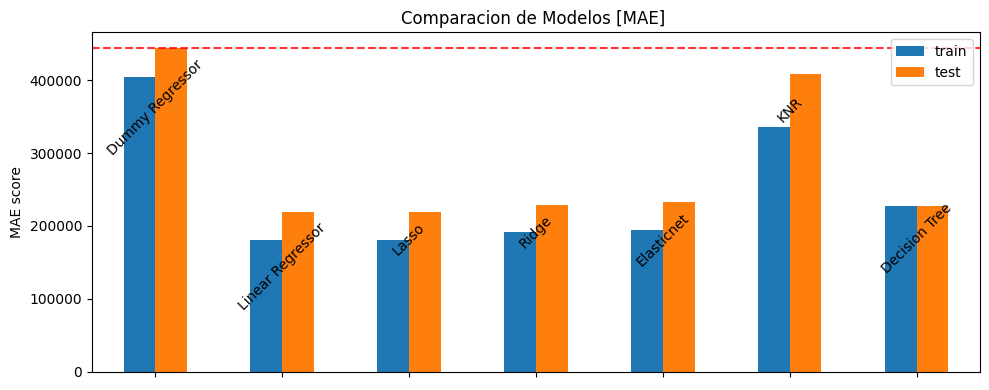

In [ ]:
# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 4))
df_comparacion.T.plot(kind='bar', ax=ax)

# Adjust the layout
ax.set_ylabel('MAE score')
ax.set_title('Comparacion de Modelos [MAE] ')

# Set the x-tick labels inside the bars and rotate by 90 degrees
ax.set_xticks(range(len(df_comparacion.columns)))
ax.set_xticklabels([])

# Draw the x-tick labels inside the bars rotated by 90 degrees
for i, label in enumerate(df_comparacion.columns):
    bar_center = (df_comparacion.loc['train', label] +
                  df_comparacion.loc['test', label]) / 2
    ax.text(i, bar_center, label, ha='center',
            va='center_baseline', rotation=45)

#plot line at DUmmerRegressor result
ax.axhline(df_comparacion['Dummy Regressor']['test'],
           color='red',
           linestyle='--',
           alpha=0.8)

plt.tight_layout()


### Cross Validation - Seleccion de Modelos
Analizar la varianza de los resultados para obtener los que tengan mejor resultado.

In [ ]:
# lista para almacenar cada uno los modelos seleccionados para el cross validation
models = []

# Alamcenando los modelos como una tupla (nombre, modelo)
models.append(('LinearRegression',LinearRegression()))
models.append(('Lasso',Lasso(alpha=0.5)))
models.append(('Elastic_net',ElasticNet(alpha=1,
                                        l1_ratio=0.5,
                                        max_iter= 100000,
                                        warm_start= True)))
models.append(('Kneighbors',KNeighborsRegressor(n_neighbors=10)))
models.append(('Decision_tree',DecisionTreeRegressor(max_depth=2)))
#models.append(('SVR',SVR(kernel='linear', epsilon=0.05, C=0.3)))


In [ ]:
# Grabar los resultados de cada modelo
from sklearn import model_selection

#Semilla para obtener los mismos resultados de pruebas
seed = 2
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    # Kfold cross validation for model selection
    kfold = model_selection.KFold(n_splits=10)
    model_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", model)])
    #X train , y train
    cv_results = model_selection.cross_val_score(model_pipe, x_train, y_train,
                                                 cv=kfold, scoring=scoring)
    # la metrica neg_mean_absolute_error se debe convertir en positiva
    cv_results = np.abs(cv_results)

    results.append(cv_results)
    names.append(name)
    msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
    print(msg)

(LinearRegression, 207637.34059436127, 56646.05209484857
(Lasso, 207638.17181162213, 56647.256288464225
(Elastic_net, 216347.02580298507, 60346.247778319375
(Kneighbors, 356468.7428571429, 67023.97803171561
(Decision_tree, 229681.69689944037, 36498.00222510334


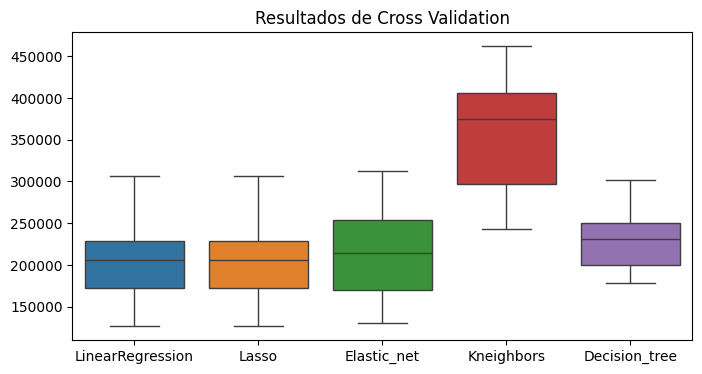

In [ ]:
plt.figure(figsize = (8,4))
result_df = pd.DataFrame(results, index=names).T
sns.boxplot(data=result_df)
plt.title("Resultados de Cross Validation")
plt.show()

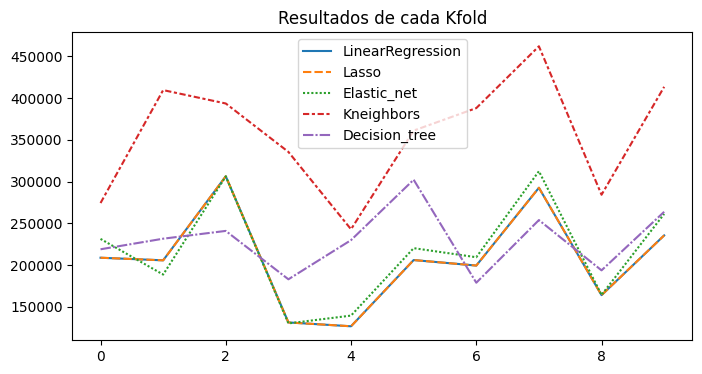

In [ ]:
plt.figure(figsize = (8,4))
sns.lineplot(data=result_df)
plt.title("Resultados de cada Kfold")
plt.show()


Comparación estadística de modelos

In [ ]:
from scipy.stats import f_oneway

model1 = result_df['LinearRegression']
model2 = result_df['Lasso']
model3 = result_df['Elastic_net']
model4 = result_df['Kneighbors']
model5 = result_df['Decision_tree']
#model6 = result_df['SVR']

#statistic, p_value = f_oneway(model1, model2, model3, model4, model5, model6)


statistic, p_value = f_oneway(model1, model2, model3, model4, model5)


print(f'Statistic: {statistic}')
print(f'p_value: {p_value}')

alpha = 0.05  # nivel de significancia

if p_value < alpha:
    print("Existe una diferencia estadísticamente "
          "significativa en los resultados de"
          " cross-validation de los modelos.")
else:
    print("No Existe una diferencia estadísticamente "
          "significativa en los resultados de "
          "cross-validation de los modelos.")


Statistic: 11.518208111125865
p_value: 1.5989753392473964e-06
Existe una diferencia estadísticamente significativa en los resultados de cross-validation de los modelos.


### Hyper Parameter Tunning
Optimizacion de hiperparametros, Se seleccionan los mejores modelos que tengan diferentes formas de funcionamiento.

In [ ]:
from sklearn.model_selection import GridSearchCV

Lasso regression:

In [ ]:
parameters = {'model__alpha': [0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]}

lasso_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                             ("model", Lasso())])

grid_search = GridSearchCV(lasso_pipe, parameters, cv=5,
                           return_train_score=True,
                           scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train);


Resultados de hiperparametrización:

In [ ]:
# la medida neg_mean_absolute_error se debe convertir en positiva
print(f"Mejor resultado = {abs(grid_search.best_score_)}")
print(f"Mejor std = {grid_search.cv_results_['std_test_score'][grid_search.best_index_]}")
print(f"Mejor parametros = {grid_search.best_params_}")


Mejor resultado = 204421.72616588615
Mejor std = 24901.549215268955
Mejor parametros = {'model__alpha': 0.2}


In [ ]:
# Para ver todos los resultados del cross validation
# No es necesario, solo es informativo para ver como varia el modelo
for i in range(len(parameters['model__alpha'])):
    print('Parametros: ', grid_search.cv_results_['params'][i])
    print('Promedio Score Prueba: ', np.abs(grid_search
                                            .cv_results_['mean_test_score'][i]))
    print('Std Score Prueba: ', grid_search.cv_results_['std_test_score'][i])

    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])


Parametros:  {'model__alpha': 0.2}
Promedio Score Prueba:  204421.72616588615
Std Score Prueba:  24901.549215268955
Rank:  1
Parametros:  {'model__alpha': 0.4}
Promedio Score Prueba:  204422.04806150278
Std Score Prueba:  24901.72967584348
Rank:  2
Parametros:  {'model__alpha': 0.6}
Promedio Score Prueba:  204422.36995713945
Std Score Prueba:  24901.91015839873
Rank:  3
Parametros:  {'model__alpha': 0.7}
Promedio Score Prueba:  204422.53090493364
Std Score Prueba:  24902.000407904317
Rank:  4
Parametros:  {'model__alpha': 0.8}
Promedio Score Prueba:  204422.6918527258
Std Score Prueba:  24902.09066292557
Rank:  5
Parametros:  {'model__alpha': 0.9}
Promedio Score Prueba:  204422.85280053265
Std Score Prueba:  24902.18092344241
Rank:  6
Parametros:  {'model__alpha': 1.0}
Promedio Score Prueba:  204423.01374837666
Std Score Prueba:  24902.27118945352
Rank:  7


In [ ]:
lasso_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                             ("model", Lasso(alpha=grid_search
                                             .best_params_['model__alpha']))])

lasso_model = lasso_pipe.fit(x_train, y_train)


In [ ]:
y_pred = lasso_model.predict(x_test)
y_pred_train = lasso_model.predict(x_train)

print('Entrenamiento score: ', mean_absolute_error(y_train, y_pred_train))
print('Prueba score: ', mean_absolute_error(y_test, y_pred))
print('R2 train: ', r2_score(y_train, y_pred_train))
print('R2 test: ', r2_score(y_test, y_pred))


Entrenamiento score:  187469.82255706206
Prueba score:  188275.30368722545
R2 train:  0.7321718227346952
R2 test:  0.7693566875991743


KNeighbors regression

In [ ]:
parameters = {'model__n_neighbors': [10, 12, 14, 18, 20, 25, 30, 35, 50]}

knn_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", KNeighborsRegressor())])

grid_search = GridSearchCV(knn_pipe, parameters, cv=5,
                           return_train_score=True,
                           scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train);


In [ ]:
print(f"Mejor resultado = {abs(grid_search.best_score_)}")
print(f"Mejor std = {grid_search.cv_results_['std_test_score'][grid_search.best_index_]}")
print(f"Mejor parametros = {grid_search.best_params_}")


Mejor resultado = 373443.643437863
Mejor std = 40997.577771457225
Mejor parametros = {'model__n_neighbors': 10}


In [ ]:
knn_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", KNeighborsRegressor(n_neighbors=grid_search.
                                                         best_params_['model__n_neighbors']))])

kneighbors_model = knn_pipe.fit(x_train, y_train)


In [ ]:
y_pred = kneighbors_model.predict(x_test)
y_pred_train = kneighbors_model.predict(x_train)

print('Entrenamiento score: ', mean_absolute_error(y_train, y_pred_train))
print('Prueba score: ', mean_absolute_error(y_test, y_pred))
print('R2 train: ', r2_score(y_train, y_pred_train))
print('R2 test: ', r2_score(y_test, y_pred))

Entrenamiento score:  299340.8695652174
Prueba score:  357189.1111111111
R2 train:  0.480861514531583
R2 test:  0.34014583907639806


Decision Tree:

In [ ]:
parameters = {'model__max_depth': [4, 5, 7, 9, 10],
              'model__max_features': [5, 10, 15, 20,30],
              'model__criterion': ['squared_error',
                                   'absolute_error',
                                   'poisson',
                                   'friedman_mse'],
              }

dt_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", DecisionTreeRegressor())])

grid_search = GridSearchCV(dt_pipe, parameters, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)
grid_search.fit(x_train, y_train);


In [ ]:
print(f"Mejor resultado = {abs(grid_search.best_score_)}")
print(f"Mejor std = {grid_search.cv_results_['std_test_score'][grid_search.best_index_]}")
print(f"Mejor parametros = {grid_search.best_params_}")


Mejor resultado = 169840.40692654354
Mejor std = 15439.475592689028
Mejor parametros = {'model__criterion': 'poisson', 'model__max_depth': 7, 'model__max_features': 20}


In [ ]:
model = DecisionTreeRegressor(max_depth=grid_search.best_params_['model__max_depth'],
                              criterion=grid_search.best_params_['model__criterion'])



dt_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model",model)])
decision_tree_model = dt_pipe.fit(x_train, y_train)


In [ ]:
y_pred = decision_tree_model.predict(x_test)
y_pred_train = decision_tree_model.predict(x_train)

print('Entrenamiento score: ', mean_absolute_error(y_train, y_pred_train))
print('Prueba score: ', mean_absolute_error(y_test, y_pred))
print('R2 train: ', r2_score(y_train, y_pred_train))
print('R2 test: ', r2_score(y_test, y_pred))

Entrenamiento score:  62860.64446868558
Prueba score:  159223.07696136992
R2 train:  0.9348463166003421
R2 test:  0.795616579911874


Esta diferencia entre entrenamiento y prueba se debe a que el modelo esta sobreajustado (overfitt), es decir, esta memorizando los datos de entrenamiento y no generaliza bien para los datos de prueba.

Este fenomeno se puede reducir con la regularizacion, en este caso con el parametro min_samples_leaf que indica el numero minimo de muestras que debe tener una hoja para que el modelo no siga creciendo. pero como se tienen pocos datos, no se va continuar con este modelo.

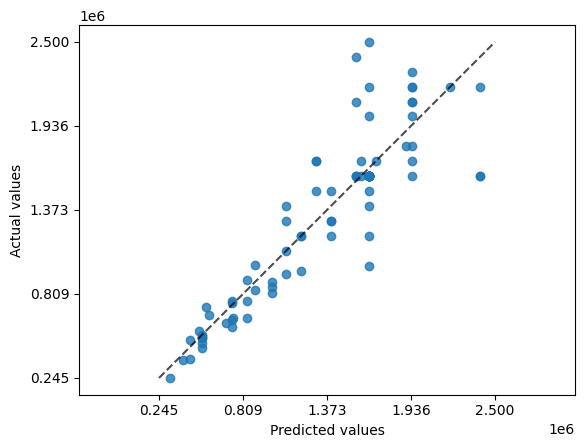

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred,
                                        kind="actual_vs_predicted");


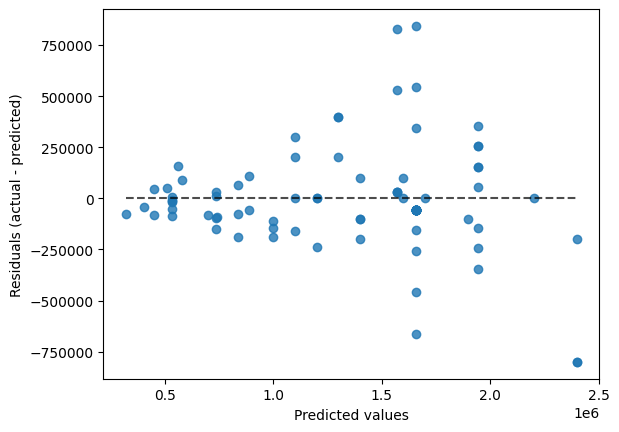

In [ ]:
PredictionErrorDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred,
                                        kind="residual_vs_predicted");


### Interpretación del modelo

El mejor modelo es Decission Tree con los parámetros 'model__criterion': 'poisson', 'model__max_depth': 7, 'model__max_features': 20

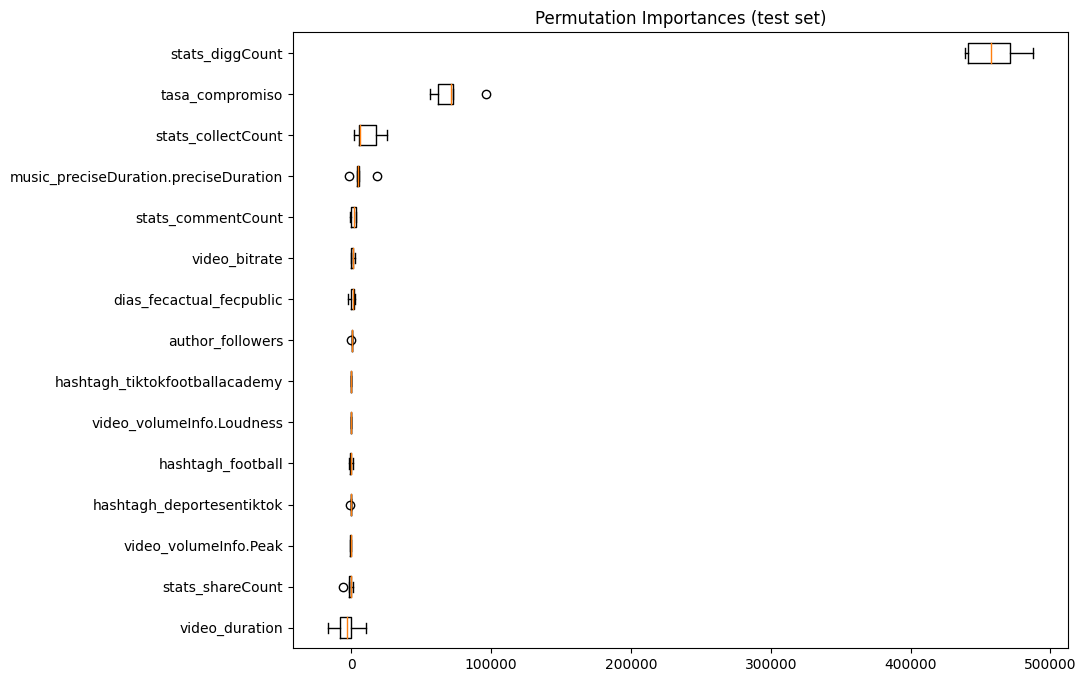

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(dt_pipe, x_test, y_test,
                              n_repeats = 5,
                              scoring= "neg_mean_absolute_error",
                              n_jobs=-1, random_state=42)
fig= plt.figure(figsize=(10,8))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx])
plt.title("Permutation Importances (test set)");

En base a estos resultados se pueden reducir el numero de variables y obtener un modelo mas simple con mas o menos el mismo desempeño.

Viendo las graficas solo tomare las 8 variables mas importantes.

In [ ]:
#los valores estan en orden ascendente, entonces se deben tomar los ultimos 8
# se puede comprobar al comparar con el grafico de barras
cols_seleccionadas = x_test.columns[perm_sorted_idx][-7:].tolist()
cols_seleccionadas

['dias_fecactual_fecpublic',
 'video_bitrate',
 'stats_commentCount',
 'music_preciseDuration.preciseDuration',
 'stats_collectCount',
 'tasa_compromiso',
 'stats_diggCount']

In [ ]:
# ESTO ES CUANDO SEA VARIABLES NUMÉRICAS Y CATEGÓRICAS
cols_seleccionadas_num=['dias_fecactual_fecpublic',
 'video_bitrate',
 'stats_commentCount',
 'music_preciseDuration.preciseDuration',
 'stats_collectCount',
 'tasa_compromiso',
 'stats_diggCount']

#cols_seleccionadas_cat=['hashtagh_deportesentiktok']

numeric_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

#categorical_pipe = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numericas', numeric_pipe, cols_seleccionadas_num)
        #('categoricas', categorical_pipe, cols_seleccionadas_cat)
        ])


model = DecisionTreeRegressor(max_depth=7, criterion='poisson')

dt_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])
dt_model = dt_pipe.fit(x_train, y_train)

Modelo con menos variables:

In [ ]:
x_train = x_train[cols_seleccionadas]
x_test = x_test[cols_seleccionadas]
x_train.head()

,dias_fecactual_fecpublic,video_bitrate,stats_commentCount,music_preciseDuration.preciseDuration,stats_collectCount,tasa_compromiso,stats_diggCount
266,219,1689145,677,17.162437,7194,0.112664,189100
37,97,1599845,775,9.482438,3965,0.101441,141000
16,88,1143819,677,6.791813,7194,0.132282,189100
253,209,4096662,274,6.452188,3034,0.100901,120600
144,172,1323245,971,9.430188,8471,0.146866,203400


In [ ]:
y_pred = dt_model.predict(x_test)
y_pred_train = dt_model.predict(x_train)

print('Entrenamiento score: ', mean_absolute_error(y_train, y_pred_train))
print('Prueba score: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', mean_squared_error(y_true  = y_test,y_pred  = y_pred,squared = False))
print('R2 train: ', r2_score(y_train, y_pred_train))
print('R2 test: ', r2_score(y_test, y_pred))


Entrenamiento score:  62727.25521770705
Prueba score:  144049.22567175017
RMSE:  217678.85657022963
R2 train:  0.9331157930289922
R2 test:  0.8451496517842046


### Procesamiento y Modelo final con scikit-learn

In [ ]:
cols_seleccionadas

['dias_fecactual_fecpublic',
 'video_bitrate',
 'stats_commentCount',
 'music_preciseDuration.preciseDuration',
 'stats_collectCount',
 'tasa_compromiso',
 'stats_diggCount']

In [ ]:
columnas=['dias_fecactual_fecpublic',
 'video_bitrate',
 'stats_commentCount',
 'music_preciseDuration.preciseDuration',
 'stats_collectCount',
 'tasa_compromiso',
 'stats_diggCount','stats_playCount']

auto_df=df_fcbarcelona_def[columnas]


In [ ]:
X = auto_df.drop('stats_playCount', axis='columns')
y = auto_df['stats_playCount']

In [ ]:
dt_model = dt_pipe.fit(X, y)

In [ ]:
from joblib import dump# libreria de serializacion

# grabar el modelo en un archivo
dump(dt_model, 'dt_model.joblib')
import pandas as pd
from joblib import load

modelo = load('dt_model.joblib')
modelo



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numericas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['dias_fecactual_fecpublic',
                                                   'video_bitrate',
                                                   'stats_commentCount',
                                                   'music_preciseDuration.preciseDuration',
                                                   'stats_collectCount',
                                                   'tasa_compromiso',
                                                   'stats_diggCount'])])),
                ('model',
                 DecisionTreeRegressor(criterion='poisson', max_depth=7))])

In [ ]:
# tomar dos datos de entrada para realizar la prediccion, eliminando la columna precio
datos_prueba = X. sample(200)
datos_prueba


,dias_fecactual_fecpublic,video_bitrate,stats_commentCount,music_preciseDuration.preciseDuration,stats_collectCount,tasa_compromiso,stats_diggCount
83,128,2353365,773,14.106063,8587,0.105273,156400
243,203,850316,677,8.803250,7194,0.173711,189100
57,110,691719,217,14.106063,2863,0.119846,70400
229,200,1919294,476,7.784438,5846,0.162238,157000
220,195,1352015,954,14.106063,10541,0.086859,293400
...,...,...,...,...,...,...,...
194,187,1894932,398,17.998314,4809,0.135052,133300
16,88,1143819,677,6.791813,7194,0.132282,189100
66,115,1151724,677,14.106063,7194,0.148264,189100
12,87,1038628,677,10.083250,7194,0.122180,189100


In [ ]:
# resultados de predicion con el modelo


#modelo.predict(datos_prueba)
modelo.predict(X)

array([ 428400.        ,  999080.        ,  508078.94736842,
        508078.94736842,  510200.        ,  364400.        ,
       2500000.        ,  834200.        , 1300000.        ,
       1648543.68932039, 1500000.        , 1600000.        ,
       1648543.68932039, 1648543.68932039,  686925.        ,
        245200.        , 1648543.68932039,  508078.94736842,
       2127777.77777778,  508078.94736842,  636625.        ,
        686925.        , 1700000.        ,  319900.        ,
       1853846.15384615, 1200000.        , 1648543.68932039,
       1648543.68932039, 1648543.68932039, 1648543.68932039,
       1400000.        ,  865525.        , 1648543.68932039,
        370100.        , 1648543.68932039, 1648543.68932039,
       1648543.68932039, 1400000.        , 2127777.77777778,
       1648543.68932039,  921100.        , 1648543.68932039,
        865525.        ,  752433.33333333,  686925.        ,
       1800000.        , 1648543.68932039, 1648543.68932039,
       1648543.68932039,

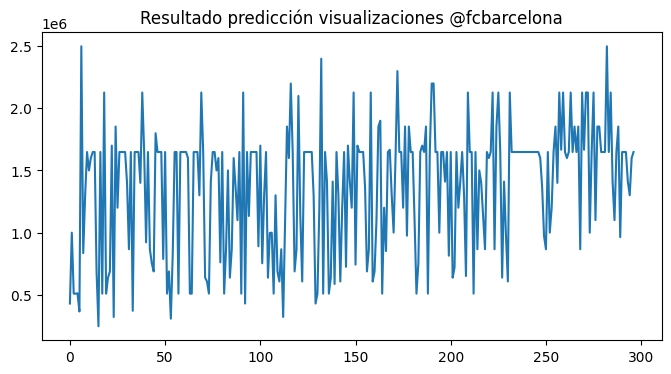

In [ ]:
plt.figure(figsize = (8,4))
sns.lineplot(data=modelo.predict(X))
plt.title("Resultado predicción visualizaciones @fcbarcelona")
plt.show()

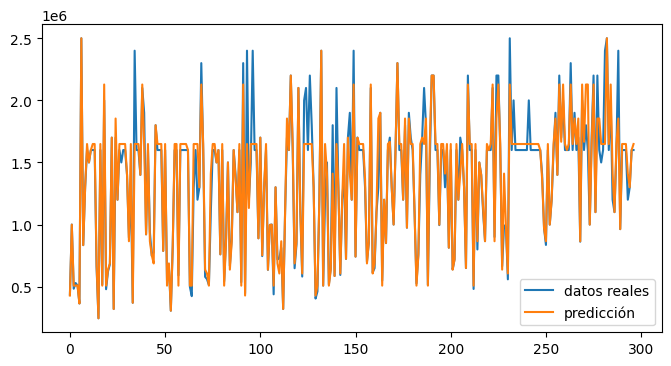

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(y,label='datos reales')
plt.plot(modelo.predict(X), label='predicción')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Algunos datos aleatorios de muestra

# Definir los dos subplots
fig = plt.figure(figsize = (8,4))
gs = fig.add_gridspec(1, 2, wspace=0)
ax1, ax2 = gs.subplots(sharey=True)

# Graficar
ax1.plot(y, color="orange")
ax2.plot(modelo.predict(X), color="deepskyblue")

# Ocultar las marcas del eje y del segundo subplot
ax2.tick_params(axis='y', which='both', left=False)
ax2.spines['left'].set_visible(False)

plt.show()